### *Import necessary libraries for data manipulation, preprocessing, visualization, and machine learning.*


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve, 
    auc,
    RocCurveDisplay
)

### *Loading the diabetes dataset and display basic information about the dataset*
#### *The dataset is assumed to be preprocessed and saved in CSV format*


In [2]:
# Load the dataset
file_path = 'weather_final.csv'   
data = pd.read_csv(file_path)

### *Preprocessing the dataset:*
#### - *Separating features (X) and target variable (y)*
#### - *Handling missing values using mean imputation*
#### - *Standardizing the features to ensure consistent scaling*
#### - *Spliting the data into training (75%) and testing (25%) sets.*


In [3]:
# Separate features and target variable
X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### *Defining KNN Classifier and Perform Grid Search*
#### - *Initializing KNN classifier.*
#### - *Defining hyperparameter grid (neighbors, weights, metrics).*
#### - *Performing GridSearchCV with 5-fold cross-validation to find the best parameters.*
#### - *Using the best model for predictions and probability estimation.*


In [4]:
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


### *Evaluating the model's performance:*
#### *- Calculating accuracy and classification report*

In [5]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("\nAccuracy on Test Set:", accuracy)
print("\nClassification Report:\n", report)


Accuracy on Test Set: 0.8693806605068155

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86     27211
           1       0.84      0.92      0.88     27444

    accuracy                           0.87     54655
   macro avg       0.87      0.87      0.87     54655
weighted avg       0.87      0.87      0.87     54655



#### *- Computing and visualize the confusion matrix*

<Figure size 1000x800 with 0 Axes>

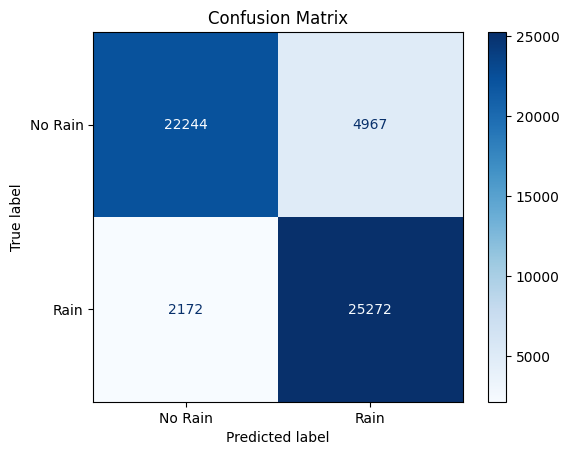

In [6]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Rain', 'Rain'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### *- Calculating the Receiver Operating Characteristic (ROC) curve and AUC score*

<Figure size 1000x800 with 0 Axes>

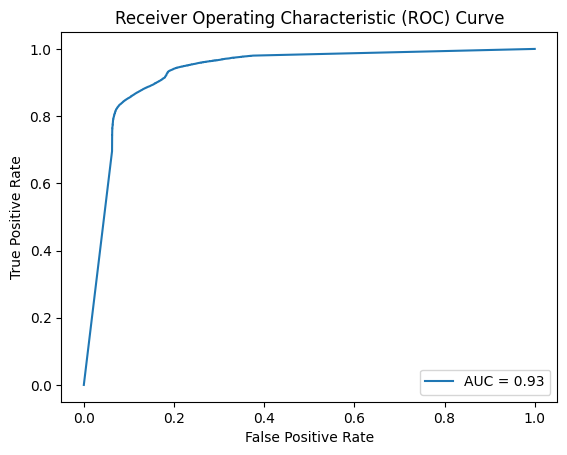


AUC Score: 0.930


In [7]:
# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

print(f"\nAUC Score: {auc_score:.3f}")